### Importing Libraries


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import math


### Initialization of parameters

In [2]:
mu_r = 2.0
epsilon_r = 6.0
mu_0 =1.25663706212E-6 
epsilon_0 =8.8541878128E-12
imp0 = np.sqrt(mu_0/epsilon_0)
delta_z = 0.004293 #converted from cm to m
N_z = 200
n_r = math.sqrt((mu_r*epsilon_r))
z = np.zeros((N_z,1))
#initialization of device parameters
Mu_r = np.ones((1,N_z))
Epsilon_r = np.ones((1,N_z))
print(Mu_r,Epsilon_r)
print(Mu_r.size,Epsilon_r.size)
#Adding the materials on the grid

Mu_r[:,13:83] = mu_r
Epsilon_r[:,13:83] = epsilon_r
print(Mu_r.shape,Epsilon_r.shape,z.shape)

[[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
  1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
  1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
  1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
  1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
  1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
  1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
  1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
  1. 1. 1. 1. 1. 1. 1. 1.]] [[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
  1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
  1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
  1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
  1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
  1. 1. 1.

### Initial computations of relevant parameters

In [3]:
#Compute time step
c_0 =  299792458 #m/s
delta_t = (1*delta_z)/(2*c_0)
print(delta_t)

#Compute Source parameters
tau = 1/(2*1.5E9) #Width of gaussian pulse
t_0 = 4*tau     #offset in time for source
print(tau,t_0)

#Compute number of iterations
t_prop = (n_r*N_z*delta_z)/c_0
T = 12*tau + 5*t_prop
iteration = math.ceil(T/delta_t)
t = np.linspace(0,iteration*delta_t,iteration)
print(T,iteration,t.shape)

7.159953303428334e-12
3.333333333333333e-10 1.3333333333333333e-09
5.360561160543398e-08 7487 (7487,)


### Defining source excitation

In [4]:
def gaussian_source(t,t_0,tau,delta_t,delta_z,c_0):
    #Set source permittivity and permeability
    mu_src =1 #these parameters should be the material permittivity/permeability at the grid position of the source injection
    epsilon_src = 1
    n_src = np.sqrt(epsilon_src*mu_src)
    delta = (n_src*delta_z/2*c_0)+(delta_t/2)
    A = -np.sqrt(epsilon_src/mu_src)
    x = (t - t_0)/tau
    Esrc = np.exp(-np.power(x,2))
    Hsrc = A*np.exp(-np.power(x,2))
    return Esrc,Hsrc

### Source excitation initialization

(200, 1) (7487,) (7487,)
0.9999822561812666 0.0 -0.0 -0.9999822561812666


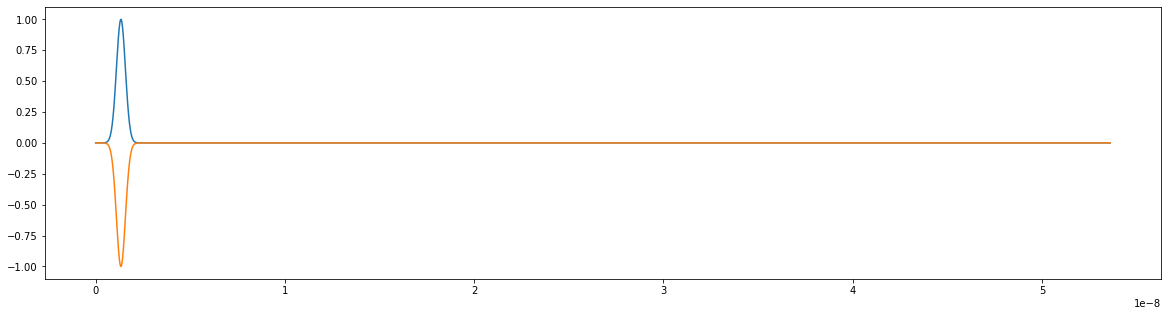

In [5]:
Esrc,Hsrc = gaussian_source(t,t_0,tau,delta_t,delta_z,c_0)
print(z.shape,Esrc.shape,Hsrc.shape)
plt.figure(figsize=[20,5])
plt.plot(t,Esrc)
plt.plot(t,Hsrc)
injection_point = 100
print(max(Esrc),min(Esrc),max(Hsrc),min(Hsrc))

### Main FDTD Loop (Basic Algorithm)

In this part, there is no excitation so n

In [ ]:
#FDTD Loop
#Creating Field values
E = np.zeros((1,N_z))
H_norm = np.zeros((1,N_z))

#Update coefficient values
m_E = c_0*delta_t/1
m_H = c_0*delta_t/1
E.shape,H_norm.shape
plt.figure(1)
#Update Equations (Looping in time)
for i in range(iteration):
    #Looping in space
    for j in range(N_z-1):
        H_norm[:,j] = H_norm[:,j] + m_H*((E[:,j+1] - E[:,j])/delta_z)
    #Boundary condition
    H_norm[:,N_z-1] = H_norm[:,N_z-1] + m_H*(-E[:,N_z-1]/delta_z)
    
    #Boundary condition
    E[:,0] = E[:,0] + m_E*((H_norm[:,0]-0)/delta_z)
    #looping in space (Electric Field)
    for j in range(1,N_z):
        E[:,j] = E[:,j] + m_E*(H_norm[:,j]/delta_z)
    
    
    
    plt.plot(E.T)#Plot E-Field
    plt.plot(H_norm.T)#Plot H-Field
    plt.ylabel('Value')
    plt.xlabel('z (Space)')
    plt.title(f'FDTD 1-D Iteration step: {i}/{iteration}')
    plt.show()
    #lineE.set_xdata(z)
    #lineE[0].set_ydata(E[i].T)
    #lineH.set_xdata(z)
    ##lineH[0].set_ydata(H_norm[i].T)
    #plt.pause(1)
    #fig.show()
    
print(E.shape,H_norm.shape)
        

#### FDTD Loop (Algorithm with Soft source) with Dirichlet Boundary Condition

In [ ]:

#FDTD Loop
#Creating Field values
E = np.zeros((1,N_z))
H_norm = np.zeros((1,N_z))
#Update coefficient values
m_E = c_0*delta_t/1
m_H = c_0*delta_t/1
E.shape,H_norm.shape

E_plot = np.zeros([iteration,N_z])
H_norm_plot = np.zeros([iteration,N_z])
print(E_plot.shape, H_norm_plot.shape)


#Update Equations (Looping in time)
for i in range(iteration):
    #Looping in space
    for j in range(N_z-1):
        H_norm[:,j] = H_norm[:,j] + m_H*((E[:,j+1] - E[:,j])/delta_z)
        if j == injection_point: #Injecting the source
            H_norm[:,j] = H_norm[:,j] + Esrc[i]
    #Boundary condition
    H_norm[:,N_z-1] = H_norm[:,N_z-1] + m_H*(-E[:,N_z-1]/delta_z)
    
    #Boundary condition
    E[:,0] = E[:,j] + m_E*(H_norm[:,0]/delta_z)
    #looping in space (Electric Field)
    for j in range(1,N_z):
        E[:,j] = E[:,j] + m_E*((H_norm[:,j] - H_norm[:,j-1])/delta_z)
        if j == injection_point: #Injecting the source
            E[:,j] = E[:,j] + Hsrc[i]
    
    E_plot[i,:] = E
    H_norm_plot[i,:] = H_norm
    print("=============================================================")
    print(f"Successfully computed field values! Iteration {i}/{iteration}....")

#### FDTD Hard source with Dirichlet Boundary Condition

In [ ]:

#FDTD Loop
#Creating Field values
E = np.zeros((1,N_z))
H_norm = np.zeros((1,N_z))
#Update coefficient values
m_E = c_0*delta_t/1
m_H = c_0*delta_t/1
E.shape,H_norm.shape

E_plot = np.zeros([iteration,N_z])
H_norm_plot = np.zeros([iteration,N_z])
print(E_plot.shape, H_norm_plot.shape)


#Update Equations (Looping in time)
for i in range(iteration):
    #Looping in space
    for j in range(N_z-1):
        H_norm[:,j] = H_norm[:,j] + m_H*((E[:,j+1] - E[:,j])/delta_z)
        if j == injection_point - 1: #Injecting the source
            H_norm[:,j] =  Esrc[i]
    #Boundary condition
    H_norm[:,N_z-1] = H_norm[:,N_z-1] + m_H*(-E[:,N_z-1]/delta_z)
    
    #Boundary condition
    E[:,0] = E[:,0] + m_E*(H_norm[:,0]/delta_z)
    #looping in space (Electric Field)
    for j in range(1,N_z):
        E[:,j] = E[:,j] + m_E*((H_norm[:,j] - H_norm[:,j-1])/delta_z)
        if j == injection_point: #Injecting the source
            E[:,j] =  Hsrc[i]
    
    E_plot[i,:] = E
    H_norm_plot[i,:] = H_norm
    print("=============================================================")
    print(f"Successfully computed field values! Iteration {i}/{iteration}....")

#### 1D FDTD Soft Source (with PBC)

In [6]:

#FDTD Loop
#Creating Field values
E = np.zeros((1,N_z))
H_norm = np.zeros((1,N_z))
#Update coefficient values
m_E = c_0*delta_t/(1*delta_z)
m_H = c_0*delta_t/(1*delta_z)
E.shape,H_norm.shape

E_plot = np.zeros([iteration,N_z])
H_norm_plot = np.zeros([iteration,N_z])
print(E_plot.shape, H_norm_plot.shape)

#Initializing the perfect boundary condition..
e1 = 0
e2 = 0
e3 = 0 
h1 = 0
h2 = 0
h3 = 0

#Update Equations (Looping in time)
for i in range(iteration):
    
    #Looping in space
    for j in range(0,N_z-1):
        H_norm[:,j] = (H_norm[:,j] + m_H*((E[:,j+1] - E[:,j])))
                                          
    #Boundary condition
    H_norm[:,N_z-1] = (H_norm[:,N_z-1] + m_H*( e3-E[:,N_z-1]))
    h3=h2
    h2=h1
    h1=H_norm[:,0]
    
                                          
    #Boundary condition
    E[:,0] = E[:,0] + m_E*(H_norm[:,0]-h3)
    #looping in space (Electric Field)
    for j in range(1,N_z):
        E[:,j] = E[:,j] + m_E*((H_norm[:,j] - H_norm[:,j-1]))
    
    e3=e2
    e2=e1
    e1=E[:,N_z-1]
    
    #Source Injection (Soft Source)
    E[:,injection_point] = E[:,injection_point] + Esrc[i]
    

    
    E_plot[i,:] = E
    H_norm_plot[i,:] = H_norm
    print("=============================================================")
    print(f"Successfully computed field values! Iteration {i}/{iteration}....")

(7487, 200) (7487, 200)
Successfully computed field values! Iteration 0/7487....
Successfully computed field values! Iteration 1/7487....
Successfully computed field values! Iteration 2/7487....
Successfully computed field values! Iteration 3/7487....
Successfully computed field values! Iteration 4/7487....
Successfully computed field values! Iteration 5/7487....
Successfully computed field values! Iteration 6/7487....
Successfully computed field values! Iteration 7/7487....
Successfully computed field values! Iteration 8/7487....
Successfully computed field values! Iteration 9/7487....
Successfully computed field values! Iteration 10/7487....
Successfully computed field values! Iteration 11/7487....
Successfully computed field values! Iteration 12/7487....
Successfully computed field values! Iteration 13/7487....
Successfully computed field values! Iteration 14/7487....
Successfully computed field values! Iteration 15/7487....
Successfully computed field values! Iteration 16/7487....


Successfully computed field values! Iteration 117/7487....
Successfully computed field values! Iteration 118/7487....
Successfully computed field values! Iteration 119/7487....
Successfully computed field values! Iteration 120/7487....
Successfully computed field values! Iteration 121/7487....
Successfully computed field values! Iteration 122/7487....
Successfully computed field values! Iteration 123/7487....
Successfully computed field values! Iteration 124/7487....
Successfully computed field values! Iteration 125/7487....
Successfully computed field values! Iteration 126/7487....
Successfully computed field values! Iteration 127/7487....
Successfully computed field values! Iteration 128/7487....
Successfully computed field values! Iteration 129/7487....
Successfully computed field values! Iteration 130/7487....
Successfully computed field values! Iteration 131/7487....
Successfully computed field values! Iteration 132/7487....
Successfully computed field values! Iteration 133/7487..

Successfully computed field values! Iteration 251/7487....
Successfully computed field values! Iteration 252/7487....
Successfully computed field values! Iteration 253/7487....
Successfully computed field values! Iteration 254/7487....
Successfully computed field values! Iteration 255/7487....
Successfully computed field values! Iteration 256/7487....
Successfully computed field values! Iteration 257/7487....
Successfully computed field values! Iteration 258/7487....
Successfully computed field values! Iteration 259/7487....
Successfully computed field values! Iteration 260/7487....
Successfully computed field values! Iteration 261/7487....
Successfully computed field values! Iteration 262/7487....
Successfully computed field values! Iteration 263/7487....
Successfully computed field values! Iteration 264/7487....
Successfully computed field values! Iteration 265/7487....
Successfully computed field values! Iteration 266/7487....
Successfully computed field values! Iteration 267/7487..

Successfully computed field values! Iteration 361/7487....
Successfully computed field values! Iteration 362/7487....
Successfully computed field values! Iteration 363/7487....
Successfully computed field values! Iteration 364/7487....
Successfully computed field values! Iteration 365/7487....
Successfully computed field values! Iteration 366/7487....
Successfully computed field values! Iteration 367/7487....
Successfully computed field values! Iteration 368/7487....
Successfully computed field values! Iteration 369/7487....
Successfully computed field values! Iteration 370/7487....
Successfully computed field values! Iteration 371/7487....
Successfully computed field values! Iteration 372/7487....
Successfully computed field values! Iteration 373/7487....
Successfully computed field values! Iteration 374/7487....
Successfully computed field values! Iteration 375/7487....
Successfully computed field values! Iteration 376/7487....
Successfully computed field values! Iteration 377/7487..

Successfully computed field values! Iteration 471/7487....
Successfully computed field values! Iteration 472/7487....
Successfully computed field values! Iteration 473/7487....
Successfully computed field values! Iteration 474/7487....
Successfully computed field values! Iteration 475/7487....
Successfully computed field values! Iteration 476/7487....
Successfully computed field values! Iteration 477/7487....
Successfully computed field values! Iteration 478/7487....
Successfully computed field values! Iteration 479/7487....
Successfully computed field values! Iteration 480/7487....
Successfully computed field values! Iteration 481/7487....
Successfully computed field values! Iteration 482/7487....
Successfully computed field values! Iteration 483/7487....
Successfully computed field values! Iteration 484/7487....
Successfully computed field values! Iteration 485/7487....
Successfully computed field values! Iteration 486/7487....
Successfully computed field values! Iteration 487/7487..

Successfully computed field values! Iteration 582/7487....
Successfully computed field values! Iteration 583/7487....
Successfully computed field values! Iteration 584/7487....
Successfully computed field values! Iteration 585/7487....
Successfully computed field values! Iteration 586/7487....
Successfully computed field values! Iteration 587/7487....
Successfully computed field values! Iteration 588/7487....
Successfully computed field values! Iteration 589/7487....
Successfully computed field values! Iteration 590/7487....
Successfully computed field values! Iteration 591/7487....
Successfully computed field values! Iteration 592/7487....
Successfully computed field values! Iteration 593/7487....
Successfully computed field values! Iteration 594/7487....
Successfully computed field values! Iteration 595/7487....
Successfully computed field values! Iteration 596/7487....
Successfully computed field values! Iteration 597/7487....
Successfully computed field values! Iteration 598/7487..

Successfully computed field values! Iteration 706/7487....
Successfully computed field values! Iteration 707/7487....
Successfully computed field values! Iteration 708/7487....
Successfully computed field values! Iteration 709/7487....
Successfully computed field values! Iteration 710/7487....
Successfully computed field values! Iteration 711/7487....
Successfully computed field values! Iteration 712/7487....
Successfully computed field values! Iteration 713/7487....
Successfully computed field values! Iteration 714/7487....
Successfully computed field values! Iteration 715/7487....
Successfully computed field values! Iteration 716/7487....
Successfully computed field values! Iteration 717/7487....
Successfully computed field values! Iteration 718/7487....
Successfully computed field values! Iteration 719/7487....
Successfully computed field values! Iteration 720/7487....
Successfully computed field values! Iteration 721/7487....
Successfully computed field values! Iteration 722/7487..

Successfully computed field values! Iteration 833/7487....
Successfully computed field values! Iteration 834/7487....
Successfully computed field values! Iteration 835/7487....
Successfully computed field values! Iteration 836/7487....
Successfully computed field values! Iteration 837/7487....
Successfully computed field values! Iteration 838/7487....
Successfully computed field values! Iteration 839/7487....
Successfully computed field values! Iteration 840/7487....
Successfully computed field values! Iteration 841/7487....
Successfully computed field values! Iteration 842/7487....
Successfully computed field values! Iteration 843/7487....
Successfully computed field values! Iteration 844/7487....
Successfully computed field values! Iteration 845/7487....
Successfully computed field values! Iteration 846/7487....
Successfully computed field values! Iteration 847/7487....
Successfully computed field values! Iteration 848/7487....
Successfully computed field values! Iteration 849/7487..

Successfully computed field values! Iteration 958/7487....
Successfully computed field values! Iteration 959/7487....
Successfully computed field values! Iteration 960/7487....
Successfully computed field values! Iteration 961/7487....
Successfully computed field values! Iteration 962/7487....
Successfully computed field values! Iteration 963/7487....
Successfully computed field values! Iteration 964/7487....
Successfully computed field values! Iteration 965/7487....
Successfully computed field values! Iteration 966/7487....
Successfully computed field values! Iteration 967/7487....
Successfully computed field values! Iteration 968/7487....
Successfully computed field values! Iteration 969/7487....
Successfully computed field values! Iteration 970/7487....
Successfully computed field values! Iteration 971/7487....
Successfully computed field values! Iteration 972/7487....
Successfully computed field values! Iteration 973/7487....
Successfully computed field values! Iteration 974/7487..

Successfully computed field values! Iteration 1076/7487....
Successfully computed field values! Iteration 1077/7487....
Successfully computed field values! Iteration 1078/7487....
Successfully computed field values! Iteration 1079/7487....
Successfully computed field values! Iteration 1080/7487....
Successfully computed field values! Iteration 1081/7487....
Successfully computed field values! Iteration 1082/7487....
Successfully computed field values! Iteration 1083/7487....
Successfully computed field values! Iteration 1084/7487....
Successfully computed field values! Iteration 1085/7487....
Successfully computed field values! Iteration 1086/7487....
Successfully computed field values! Iteration 1087/7487....
Successfully computed field values! Iteration 1088/7487....
Successfully computed field values! Iteration 1089/7487....
Successfully computed field values! Iteration 1090/7487....
Successfully computed field values! Iteration 1091/7487....
Successfully computed field values! Iter

Successfully computed field values! Iteration 1201/7487....
Successfully computed field values! Iteration 1202/7487....
Successfully computed field values! Iteration 1203/7487....
Successfully computed field values! Iteration 1204/7487....
Successfully computed field values! Iteration 1205/7487....
Successfully computed field values! Iteration 1206/7487....
Successfully computed field values! Iteration 1207/7487....
Successfully computed field values! Iteration 1208/7487....
Successfully computed field values! Iteration 1209/7487....
Successfully computed field values! Iteration 1210/7487....
Successfully computed field values! Iteration 1211/7487....
Successfully computed field values! Iteration 1212/7487....
Successfully computed field values! Iteration 1213/7487....
Successfully computed field values! Iteration 1214/7487....
Successfully computed field values! Iteration 1215/7487....
Successfully computed field values! Iteration 1216/7487....
Successfully computed field values! Iter

Successfully computed field values! Iteration 1329/7487....
Successfully computed field values! Iteration 1330/7487....
Successfully computed field values! Iteration 1331/7487....
Successfully computed field values! Iteration 1332/7487....
Successfully computed field values! Iteration 1333/7487....
Successfully computed field values! Iteration 1334/7487....
Successfully computed field values! Iteration 1335/7487....
Successfully computed field values! Iteration 1336/7487....
Successfully computed field values! Iteration 1337/7487....
Successfully computed field values! Iteration 1338/7487....
Successfully computed field values! Iteration 1339/7487....
Successfully computed field values! Iteration 1340/7487....
Successfully computed field values! Iteration 1341/7487....
Successfully computed field values! Iteration 1342/7487....
Successfully computed field values! Iteration 1343/7487....
Successfully computed field values! Iteration 1344/7487....
Successfully computed field values! Iter

Successfully computed field values! Iteration 1398/7487....
Successfully computed field values! Iteration 1399/7487....
Successfully computed field values! Iteration 1400/7487....
Successfully computed field values! Iteration 1401/7487....
Successfully computed field values! Iteration 1402/7487....
Successfully computed field values! Iteration 1403/7487....
Successfully computed field values! Iteration 1404/7487....
Successfully computed field values! Iteration 1405/7487....
Successfully computed field values! Iteration 1406/7487....
Successfully computed field values! Iteration 1407/7487....
Successfully computed field values! Iteration 1408/7487....
Successfully computed field values! Iteration 1409/7487....
Successfully computed field values! Iteration 1410/7487....
Successfully computed field values! Iteration 1411/7487....
Successfully computed field values! Iteration 1412/7487....
Successfully computed field values! Iteration 1413/7487....
Successfully computed field values! Iter

Successfully computed field values! Iteration 1493/7487....
Successfully computed field values! Iteration 1494/7487....
Successfully computed field values! Iteration 1495/7487....
Successfully computed field values! Iteration 1496/7487....
Successfully computed field values! Iteration 1497/7487....
Successfully computed field values! Iteration 1498/7487....
Successfully computed field values! Iteration 1499/7487....
Successfully computed field values! Iteration 1500/7487....
Successfully computed field values! Iteration 1501/7487....
Successfully computed field values! Iteration 1502/7487....
Successfully computed field values! Iteration 1503/7487....
Successfully computed field values! Iteration 1504/7487....
Successfully computed field values! Iteration 1505/7487....
Successfully computed field values! Iteration 1506/7487....
Successfully computed field values! Iteration 1507/7487....
Successfully computed field values! Iteration 1508/7487....
Successfully computed field values! Iter

Successfully computed field values! Iteration 1576/7487....
Successfully computed field values! Iteration 1577/7487....
Successfully computed field values! Iteration 1578/7487....
Successfully computed field values! Iteration 1579/7487....
Successfully computed field values! Iteration 1580/7487....
Successfully computed field values! Iteration 1581/7487....
Successfully computed field values! Iteration 1582/7487....
Successfully computed field values! Iteration 1583/7487....
Successfully computed field values! Iteration 1584/7487....
Successfully computed field values! Iteration 1585/7487....
Successfully computed field values! Iteration 1586/7487....
Successfully computed field values! Iteration 1587/7487....
Successfully computed field values! Iteration 1588/7487....
Successfully computed field values! Iteration 1589/7487....
Successfully computed field values! Iteration 1590/7487....
Successfully computed field values! Iteration 1591/7487....
Successfully computed field values! Iter

Successfully computed field values! Iteration 1689/7487....
Successfully computed field values! Iteration 1690/7487....
Successfully computed field values! Iteration 1691/7487....
Successfully computed field values! Iteration 1692/7487....
Successfully computed field values! Iteration 1693/7487....
Successfully computed field values! Iteration 1694/7487....
Successfully computed field values! Iteration 1695/7487....
Successfully computed field values! Iteration 1696/7487....
Successfully computed field values! Iteration 1697/7487....
Successfully computed field values! Iteration 1698/7487....
Successfully computed field values! Iteration 1699/7487....
Successfully computed field values! Iteration 1700/7487....
Successfully computed field values! Iteration 1701/7487....
Successfully computed field values! Iteration 1702/7487....
Successfully computed field values! Iteration 1703/7487....
Successfully computed field values! Iteration 1704/7487....
Successfully computed field values! Iter

Successfully computed field values! Iteration 1820/7487....
Successfully computed field values! Iteration 1821/7487....
Successfully computed field values! Iteration 1822/7487....
Successfully computed field values! Iteration 1823/7487....
Successfully computed field values! Iteration 1824/7487....
Successfully computed field values! Iteration 1825/7487....
Successfully computed field values! Iteration 1826/7487....
Successfully computed field values! Iteration 1827/7487....
Successfully computed field values! Iteration 1828/7487....
Successfully computed field values! Iteration 1829/7487....
Successfully computed field values! Iteration 1830/7487....
Successfully computed field values! Iteration 1831/7487....
Successfully computed field values! Iteration 1832/7487....
Successfully computed field values! Iteration 1833/7487....
Successfully computed field values! Iteration 1834/7487....
Successfully computed field values! Iteration 1835/7487....
Successfully computed field values! Iter

Successfully computed field values! Iteration 1945/7487....
Successfully computed field values! Iteration 1946/7487....
Successfully computed field values! Iteration 1947/7487....
Successfully computed field values! Iteration 1948/7487....
Successfully computed field values! Iteration 1949/7487....
Successfully computed field values! Iteration 1950/7487....
Successfully computed field values! Iteration 1951/7487....
Successfully computed field values! Iteration 1952/7487....
Successfully computed field values! Iteration 1953/7487....
Successfully computed field values! Iteration 1954/7487....
Successfully computed field values! Iteration 1955/7487....
Successfully computed field values! Iteration 1956/7487....
Successfully computed field values! Iteration 1957/7487....
Successfully computed field values! Iteration 1958/7487....
Successfully computed field values! Iteration 1959/7487....
Successfully computed field values! Iteration 1960/7487....
Successfully computed field values! Iter

Successfully computed field values! Iteration 2068/7487....
Successfully computed field values! Iteration 2069/7487....
Successfully computed field values! Iteration 2070/7487....
Successfully computed field values! Iteration 2071/7487....
Successfully computed field values! Iteration 2072/7487....
Successfully computed field values! Iteration 2073/7487....
Successfully computed field values! Iteration 2074/7487....
Successfully computed field values! Iteration 2075/7487....
Successfully computed field values! Iteration 2076/7487....
Successfully computed field values! Iteration 2077/7487....
Successfully computed field values! Iteration 2078/7487....
Successfully computed field values! Iteration 2079/7487....
Successfully computed field values! Iteration 2080/7487....
Successfully computed field values! Iteration 2081/7487....
Successfully computed field values! Iteration 2082/7487....
Successfully computed field values! Iteration 2083/7487....
Successfully computed field values! Iter

Successfully computed field values! Iteration 2175/7487....
Successfully computed field values! Iteration 2176/7487....
Successfully computed field values! Iteration 2177/7487....
Successfully computed field values! Iteration 2178/7487....
Successfully computed field values! Iteration 2179/7487....
Successfully computed field values! Iteration 2180/7487....
Successfully computed field values! Iteration 2181/7487....
Successfully computed field values! Iteration 2182/7487....
Successfully computed field values! Iteration 2183/7487....
Successfully computed field values! Iteration 2184/7487....
Successfully computed field values! Iteration 2185/7487....
Successfully computed field values! Iteration 2186/7487....
Successfully computed field values! Iteration 2187/7487....
Successfully computed field values! Iteration 2188/7487....
Successfully computed field values! Iteration 2189/7487....
Successfully computed field values! Iteration 2190/7487....
Successfully computed field values! Iter

Successfully computed field values! Iteration 2305/7487....
Successfully computed field values! Iteration 2306/7487....
Successfully computed field values! Iteration 2307/7487....
Successfully computed field values! Iteration 2308/7487....
Successfully computed field values! Iteration 2309/7487....
Successfully computed field values! Iteration 2310/7487....
Successfully computed field values! Iteration 2311/7487....
Successfully computed field values! Iteration 2312/7487....
Successfully computed field values! Iteration 2313/7487....
Successfully computed field values! Iteration 2314/7487....
Successfully computed field values! Iteration 2315/7487....
Successfully computed field values! Iteration 2316/7487....
Successfully computed field values! Iteration 2317/7487....
Successfully computed field values! Iteration 2318/7487....
Successfully computed field values! Iteration 2319/7487....
Successfully computed field values! Iteration 2320/7487....
Successfully computed field values! Iter

Successfully computed field values! Iteration 2431/7487....
Successfully computed field values! Iteration 2432/7487....
Successfully computed field values! Iteration 2433/7487....
Successfully computed field values! Iteration 2434/7487....
Successfully computed field values! Iteration 2435/7487....
Successfully computed field values! Iteration 2436/7487....
Successfully computed field values! Iteration 2437/7487....
Successfully computed field values! Iteration 2438/7487....
Successfully computed field values! Iteration 2439/7487....
Successfully computed field values! Iteration 2440/7487....
Successfully computed field values! Iteration 2441/7487....
Successfully computed field values! Iteration 2442/7487....
Successfully computed field values! Iteration 2443/7487....
Successfully computed field values! Iteration 2444/7487....
Successfully computed field values! Iteration 2445/7487....
Successfully computed field values! Iteration 2446/7487....
Successfully computed field values! Iter

Successfully computed field values! Iteration 2565/7487....
Successfully computed field values! Iteration 2566/7487....
Successfully computed field values! Iteration 2567/7487....
Successfully computed field values! Iteration 2568/7487....
Successfully computed field values! Iteration 2569/7487....
Successfully computed field values! Iteration 2570/7487....
Successfully computed field values! Iteration 2571/7487....
Successfully computed field values! Iteration 2572/7487....
Successfully computed field values! Iteration 2573/7487....
Successfully computed field values! Iteration 2574/7487....
Successfully computed field values! Iteration 2575/7487....
Successfully computed field values! Iteration 2576/7487....
Successfully computed field values! Iteration 2577/7487....
Successfully computed field values! Iteration 2578/7487....
Successfully computed field values! Iteration 2579/7487....
Successfully computed field values! Iteration 2580/7487....
Successfully computed field values! Iter

Successfully computed field values! Iteration 2692/7487....
Successfully computed field values! Iteration 2693/7487....
Successfully computed field values! Iteration 2694/7487....
Successfully computed field values! Iteration 2695/7487....
Successfully computed field values! Iteration 2696/7487....
Successfully computed field values! Iteration 2697/7487....
Successfully computed field values! Iteration 2698/7487....
Successfully computed field values! Iteration 2699/7487....
Successfully computed field values! Iteration 2700/7487....
Successfully computed field values! Iteration 2701/7487....
Successfully computed field values! Iteration 2702/7487....
Successfully computed field values! Iteration 2703/7487....
Successfully computed field values! Iteration 2704/7487....
Successfully computed field values! Iteration 2705/7487....
Successfully computed field values! Iteration 2706/7487....
Successfully computed field values! Iteration 2707/7487....
Successfully computed field values! Iter

Successfully computed field values! Iteration 2824/7487....
Successfully computed field values! Iteration 2825/7487....
Successfully computed field values! Iteration 2826/7487....
Successfully computed field values! Iteration 2827/7487....
Successfully computed field values! Iteration 2828/7487....
Successfully computed field values! Iteration 2829/7487....
Successfully computed field values! Iteration 2830/7487....
Successfully computed field values! Iteration 2831/7487....
Successfully computed field values! Iteration 2832/7487....
Successfully computed field values! Iteration 2833/7487....
Successfully computed field values! Iteration 2834/7487....
Successfully computed field values! Iteration 2835/7487....
Successfully computed field values! Iteration 2836/7487....
Successfully computed field values! Iteration 2837/7487....
Successfully computed field values! Iteration 2838/7487....
Successfully computed field values! Iteration 2839/7487....
Successfully computed field values! Iter

Successfully computed field values! Iteration 2958/7487....
Successfully computed field values! Iteration 2959/7487....
Successfully computed field values! Iteration 2960/7487....
Successfully computed field values! Iteration 2961/7487....
Successfully computed field values! Iteration 2962/7487....
Successfully computed field values! Iteration 2963/7487....
Successfully computed field values! Iteration 2964/7487....
Successfully computed field values! Iteration 2965/7487....
Successfully computed field values! Iteration 2966/7487....
Successfully computed field values! Iteration 2967/7487....
Successfully computed field values! Iteration 2968/7487....
Successfully computed field values! Iteration 2969/7487....
Successfully computed field values! Iteration 2970/7487....
Successfully computed field values! Iteration 2971/7487....
Successfully computed field values! Iteration 2972/7487....
Successfully computed field values! Iteration 2973/7487....
Successfully computed field values! Iter

Successfully computed field values! Iteration 3026/7487....
Successfully computed field values! Iteration 3027/7487....
Successfully computed field values! Iteration 3028/7487....
Successfully computed field values! Iteration 3029/7487....
Successfully computed field values! Iteration 3030/7487....
Successfully computed field values! Iteration 3031/7487....
Successfully computed field values! Iteration 3032/7487....
Successfully computed field values! Iteration 3033/7487....
Successfully computed field values! Iteration 3034/7487....
Successfully computed field values! Iteration 3035/7487....
Successfully computed field values! Iteration 3036/7487....
Successfully computed field values! Iteration 3037/7487....
Successfully computed field values! Iteration 3038/7487....
Successfully computed field values! Iteration 3039/7487....
Successfully computed field values! Iteration 3040/7487....
Successfully computed field values! Iteration 3041/7487....
Successfully computed field values! Iter

Successfully computed field values! Iteration 3162/7487....
Successfully computed field values! Iteration 3163/7487....
Successfully computed field values! Iteration 3164/7487....
Successfully computed field values! Iteration 3165/7487....
Successfully computed field values! Iteration 3166/7487....
Successfully computed field values! Iteration 3167/7487....
Successfully computed field values! Iteration 3168/7487....
Successfully computed field values! Iteration 3169/7487....
Successfully computed field values! Iteration 3170/7487....
Successfully computed field values! Iteration 3171/7487....
Successfully computed field values! Iteration 3172/7487....
Successfully computed field values! Iteration 3173/7487....
Successfully computed field values! Iteration 3174/7487....
Successfully computed field values! Iteration 3175/7487....
Successfully computed field values! Iteration 3176/7487....
Successfully computed field values! Iteration 3177/7487....
Successfully computed field values! Iter

Successfully computed field values! Iteration 3231/7487....
Successfully computed field values! Iteration 3232/7487....
Successfully computed field values! Iteration 3233/7487....
Successfully computed field values! Iteration 3234/7487....
Successfully computed field values! Iteration 3235/7487....
Successfully computed field values! Iteration 3236/7487....
Successfully computed field values! Iteration 3237/7487....
Successfully computed field values! Iteration 3238/7487....
Successfully computed field values! Iteration 3239/7487....
Successfully computed field values! Iteration 3240/7487....
Successfully computed field values! Iteration 3241/7487....
Successfully computed field values! Iteration 3242/7487....
Successfully computed field values! Iteration 3243/7487....
Successfully computed field values! Iteration 3244/7487....
Successfully computed field values! Iteration 3245/7487....
Successfully computed field values! Iteration 3246/7487....
Successfully computed field values! Iter

Successfully computed field values! Iteration 3301/7487....
Successfully computed field values! Iteration 3302/7487....
Successfully computed field values! Iteration 3303/7487....
Successfully computed field values! Iteration 3304/7487....
Successfully computed field values! Iteration 3305/7487....
Successfully computed field values! Iteration 3306/7487....
Successfully computed field values! Iteration 3307/7487....
Successfully computed field values! Iteration 3308/7487....
Successfully computed field values! Iteration 3309/7487....
Successfully computed field values! Iteration 3310/7487....
Successfully computed field values! Iteration 3311/7487....
Successfully computed field values! Iteration 3312/7487....
Successfully computed field values! Iteration 3313/7487....
Successfully computed field values! Iteration 3314/7487....
Successfully computed field values! Iteration 3315/7487....
Successfully computed field values! Iteration 3316/7487....
Successfully computed field values! Iter

Successfully computed field values! Iteration 3371/7487....
Successfully computed field values! Iteration 3372/7487....
Successfully computed field values! Iteration 3373/7487....
Successfully computed field values! Iteration 3374/7487....
Successfully computed field values! Iteration 3375/7487....
Successfully computed field values! Iteration 3376/7487....
Successfully computed field values! Iteration 3377/7487....
Successfully computed field values! Iteration 3378/7487....
Successfully computed field values! Iteration 3379/7487....
Successfully computed field values! Iteration 3380/7487....
Successfully computed field values! Iteration 3381/7487....
Successfully computed field values! Iteration 3382/7487....
Successfully computed field values! Iteration 3383/7487....
Successfully computed field values! Iteration 3384/7487....
Successfully computed field values! Iteration 3385/7487....
Successfully computed field values! Iteration 3386/7487....
Successfully computed field values! Iter

Successfully computed field values! Iteration 3440/7487....
Successfully computed field values! Iteration 3441/7487....
Successfully computed field values! Iteration 3442/7487....
Successfully computed field values! Iteration 3443/7487....
Successfully computed field values! Iteration 3444/7487....
Successfully computed field values! Iteration 3445/7487....
Successfully computed field values! Iteration 3446/7487....
Successfully computed field values! Iteration 3447/7487....
Successfully computed field values! Iteration 3448/7487....
Successfully computed field values! Iteration 3449/7487....
Successfully computed field values! Iteration 3450/7487....
Successfully computed field values! Iteration 3451/7487....
Successfully computed field values! Iteration 3452/7487....
Successfully computed field values! Iteration 3453/7487....
Successfully computed field values! Iteration 3454/7487....
Successfully computed field values! Iteration 3455/7487....
Successfully computed field values! Iter

Successfully computed field values! Iteration 3510/7487....
Successfully computed field values! Iteration 3511/7487....
Successfully computed field values! Iteration 3512/7487....
Successfully computed field values! Iteration 3513/7487....
Successfully computed field values! Iteration 3514/7487....
Successfully computed field values! Iteration 3515/7487....
Successfully computed field values! Iteration 3516/7487....
Successfully computed field values! Iteration 3517/7487....
Successfully computed field values! Iteration 3518/7487....
Successfully computed field values! Iteration 3519/7487....
Successfully computed field values! Iteration 3520/7487....
Successfully computed field values! Iteration 3521/7487....
Successfully computed field values! Iteration 3522/7487....
Successfully computed field values! Iteration 3523/7487....
Successfully computed field values! Iteration 3524/7487....
Successfully computed field values! Iteration 3525/7487....
Successfully computed field values! Iter

Successfully computed field values! Iteration 3641/7487....
Successfully computed field values! Iteration 3642/7487....
Successfully computed field values! Iteration 3643/7487....
Successfully computed field values! Iteration 3644/7487....
Successfully computed field values! Iteration 3645/7487....
Successfully computed field values! Iteration 3646/7487....
Successfully computed field values! Iteration 3647/7487....
Successfully computed field values! Iteration 3648/7487....
Successfully computed field values! Iteration 3649/7487....
Successfully computed field values! Iteration 3650/7487....
Successfully computed field values! Iteration 3651/7487....
Successfully computed field values! Iteration 3652/7487....
Successfully computed field values! Iteration 3653/7487....
Successfully computed field values! Iteration 3654/7487....
Successfully computed field values! Iteration 3655/7487....
Successfully computed field values! Iteration 3656/7487....
Successfully computed field values! Iter

Successfully computed field values! Iteration 3710/7487....
Successfully computed field values! Iteration 3711/7487....
Successfully computed field values! Iteration 3712/7487....
Successfully computed field values! Iteration 3713/7487....
Successfully computed field values! Iteration 3714/7487....
Successfully computed field values! Iteration 3715/7487....
Successfully computed field values! Iteration 3716/7487....
Successfully computed field values! Iteration 3717/7487....
Successfully computed field values! Iteration 3718/7487....
Successfully computed field values! Iteration 3719/7487....
Successfully computed field values! Iteration 3720/7487....
Successfully computed field values! Iteration 3721/7487....
Successfully computed field values! Iteration 3722/7487....
Successfully computed field values! Iteration 3723/7487....
Successfully computed field values! Iteration 3724/7487....
Successfully computed field values! Iteration 3725/7487....
Successfully computed field values! Iter

Successfully computed field values! Iteration 3778/7487....
Successfully computed field values! Iteration 3779/7487....
Successfully computed field values! Iteration 3780/7487....
Successfully computed field values! Iteration 3781/7487....
Successfully computed field values! Iteration 3782/7487....
Successfully computed field values! Iteration 3783/7487....
Successfully computed field values! Iteration 3784/7487....
Successfully computed field values! Iteration 3785/7487....
Successfully computed field values! Iteration 3786/7487....
Successfully computed field values! Iteration 3787/7487....
Successfully computed field values! Iteration 3788/7487....
Successfully computed field values! Iteration 3789/7487....
Successfully computed field values! Iteration 3790/7487....
Successfully computed field values! Iteration 3791/7487....
Successfully computed field values! Iteration 3792/7487....
Successfully computed field values! Iteration 3793/7487....
Successfully computed field values! Iter

Successfully computed field values! Iteration 3846/7487....
Successfully computed field values! Iteration 3847/7487....
Successfully computed field values! Iteration 3848/7487....
Successfully computed field values! Iteration 3849/7487....
Successfully computed field values! Iteration 3850/7487....
Successfully computed field values! Iteration 3851/7487....
Successfully computed field values! Iteration 3852/7487....
Successfully computed field values! Iteration 3853/7487....
Successfully computed field values! Iteration 3854/7487....
Successfully computed field values! Iteration 3855/7487....
Successfully computed field values! Iteration 3856/7487....
Successfully computed field values! Iteration 3857/7487....
Successfully computed field values! Iteration 3858/7487....
Successfully computed field values! Iteration 3859/7487....
Successfully computed field values! Iteration 3860/7487....
Successfully computed field values! Iteration 3861/7487....
Successfully computed field values! Iter

Successfully computed field values! Iteration 3916/7487....
Successfully computed field values! Iteration 3917/7487....
Successfully computed field values! Iteration 3918/7487....
Successfully computed field values! Iteration 3919/7487....
Successfully computed field values! Iteration 3920/7487....
Successfully computed field values! Iteration 3921/7487....
Successfully computed field values! Iteration 3922/7487....
Successfully computed field values! Iteration 3923/7487....
Successfully computed field values! Iteration 3924/7487....
Successfully computed field values! Iteration 3925/7487....
Successfully computed field values! Iteration 3926/7487....
Successfully computed field values! Iteration 3927/7487....
Successfully computed field values! Iteration 3928/7487....
Successfully computed field values! Iteration 3929/7487....
Successfully computed field values! Iteration 3930/7487....
Successfully computed field values! Iteration 3931/7487....
Successfully computed field values! Iter

Successfully computed field values! Iteration 4051/7487....
Successfully computed field values! Iteration 4052/7487....
Successfully computed field values! Iteration 4053/7487....
Successfully computed field values! Iteration 4054/7487....
Successfully computed field values! Iteration 4055/7487....
Successfully computed field values! Iteration 4056/7487....
Successfully computed field values! Iteration 4057/7487....
Successfully computed field values! Iteration 4058/7487....
Successfully computed field values! Iteration 4059/7487....
Successfully computed field values! Iteration 4060/7487....
Successfully computed field values! Iteration 4061/7487....
Successfully computed field values! Iteration 4062/7487....
Successfully computed field values! Iteration 4063/7487....
Successfully computed field values! Iteration 4064/7487....
Successfully computed field values! Iteration 4065/7487....
Successfully computed field values! Iteration 4066/7487....
Successfully computed field values! Iter

Successfully computed field values! Iteration 4187/7487....
Successfully computed field values! Iteration 4188/7487....
Successfully computed field values! Iteration 4189/7487....
Successfully computed field values! Iteration 4190/7487....
Successfully computed field values! Iteration 4191/7487....
Successfully computed field values! Iteration 4192/7487....
Successfully computed field values! Iteration 4193/7487....
Successfully computed field values! Iteration 4194/7487....
Successfully computed field values! Iteration 4195/7487....
Successfully computed field values! Iteration 4196/7487....
Successfully computed field values! Iteration 4197/7487....
Successfully computed field values! Iteration 4198/7487....
Successfully computed field values! Iteration 4199/7487....
Successfully computed field values! Iteration 4200/7487....
Successfully computed field values! Iteration 4201/7487....
Successfully computed field values! Iteration 4202/7487....
Successfully computed field values! Iter

Successfully computed field values! Iteration 4256/7487....
Successfully computed field values! Iteration 4257/7487....
Successfully computed field values! Iteration 4258/7487....
Successfully computed field values! Iteration 4259/7487....
Successfully computed field values! Iteration 4260/7487....
Successfully computed field values! Iteration 4261/7487....
Successfully computed field values! Iteration 4262/7487....
Successfully computed field values! Iteration 4263/7487....
Successfully computed field values! Iteration 4264/7487....
Successfully computed field values! Iteration 4265/7487....
Successfully computed field values! Iteration 4266/7487....
Successfully computed field values! Iteration 4267/7487....
Successfully computed field values! Iteration 4268/7487....
Successfully computed field values! Iteration 4269/7487....
Successfully computed field values! Iteration 4270/7487....
Successfully computed field values! Iteration 4271/7487....
Successfully computed field values! Iter

Successfully computed field values! Iteration 4389/7487....
Successfully computed field values! Iteration 4390/7487....
Successfully computed field values! Iteration 4391/7487....
Successfully computed field values! Iteration 4392/7487....
Successfully computed field values! Iteration 4393/7487....
Successfully computed field values! Iteration 4394/7487....
Successfully computed field values! Iteration 4395/7487....
Successfully computed field values! Iteration 4396/7487....
Successfully computed field values! Iteration 4397/7487....
Successfully computed field values! Iteration 4398/7487....
Successfully computed field values! Iteration 4399/7487....
Successfully computed field values! Iteration 4400/7487....
Successfully computed field values! Iteration 4401/7487....
Successfully computed field values! Iteration 4402/7487....
Successfully computed field values! Iteration 4403/7487....
Successfully computed field values! Iteration 4404/7487....
Successfully computed field values! Iter

Successfully computed field values! Iteration 4514/7487....
Successfully computed field values! Iteration 4515/7487....
Successfully computed field values! Iteration 4516/7487....
Successfully computed field values! Iteration 4517/7487....
Successfully computed field values! Iteration 4518/7487....
Successfully computed field values! Iteration 4519/7487....
Successfully computed field values! Iteration 4520/7487....
Successfully computed field values! Iteration 4521/7487....
Successfully computed field values! Iteration 4522/7487....
Successfully computed field values! Iteration 4523/7487....
Successfully computed field values! Iteration 4524/7487....
Successfully computed field values! Iteration 4525/7487....
Successfully computed field values! Iteration 4526/7487....
Successfully computed field values! Iteration 4527/7487....
Successfully computed field values! Iteration 4528/7487....
Successfully computed field values! Iteration 4529/7487....
Successfully computed field values! Iter

Successfully computed field values! Iteration 4648/7487....
Successfully computed field values! Iteration 4649/7487....
Successfully computed field values! Iteration 4650/7487....
Successfully computed field values! Iteration 4651/7487....
Successfully computed field values! Iteration 4652/7487....
Successfully computed field values! Iteration 4653/7487....
Successfully computed field values! Iteration 4654/7487....
Successfully computed field values! Iteration 4655/7487....
Successfully computed field values! Iteration 4656/7487....
Successfully computed field values! Iteration 4657/7487....
Successfully computed field values! Iteration 4658/7487....
Successfully computed field values! Iteration 4659/7487....
Successfully computed field values! Iteration 4660/7487....
Successfully computed field values! Iteration 4661/7487....
Successfully computed field values! Iteration 4662/7487....
Successfully computed field values! Iteration 4663/7487....
Successfully computed field values! Iter

Successfully computed field values! Iteration 4775/7487....
Successfully computed field values! Iteration 4776/7487....
Successfully computed field values! Iteration 4777/7487....
Successfully computed field values! Iteration 4778/7487....
Successfully computed field values! Iteration 4779/7487....
Successfully computed field values! Iteration 4780/7487....
Successfully computed field values! Iteration 4781/7487....
Successfully computed field values! Iteration 4782/7487....
Successfully computed field values! Iteration 4783/7487....
Successfully computed field values! Iteration 4784/7487....
Successfully computed field values! Iteration 4785/7487....
Successfully computed field values! Iteration 4786/7487....
Successfully computed field values! Iteration 4787/7487....
Successfully computed field values! Iteration 4788/7487....
Successfully computed field values! Iteration 4789/7487....
Successfully computed field values! Iteration 4790/7487....
Successfully computed field values! Iter

Successfully computed field values! Iteration 4897/7487....
Successfully computed field values! Iteration 4898/7487....
Successfully computed field values! Iteration 4899/7487....
Successfully computed field values! Iteration 4900/7487....
Successfully computed field values! Iteration 4901/7487....
Successfully computed field values! Iteration 4902/7487....
Successfully computed field values! Iteration 4903/7487....
Successfully computed field values! Iteration 4904/7487....
Successfully computed field values! Iteration 4905/7487....
Successfully computed field values! Iteration 4906/7487....
Successfully computed field values! Iteration 4907/7487....
Successfully computed field values! Iteration 4908/7487....
Successfully computed field values! Iteration 4909/7487....
Successfully computed field values! Iteration 4910/7487....
Successfully computed field values! Iteration 4911/7487....
Successfully computed field values! Iteration 4912/7487....
Successfully computed field values! Iter

Successfully computed field values! Iteration 5022/7487....
Successfully computed field values! Iteration 5023/7487....
Successfully computed field values! Iteration 5024/7487....
Successfully computed field values! Iteration 5025/7487....
Successfully computed field values! Iteration 5026/7487....
Successfully computed field values! Iteration 5027/7487....
Successfully computed field values! Iteration 5028/7487....
Successfully computed field values! Iteration 5029/7487....
Successfully computed field values! Iteration 5030/7487....
Successfully computed field values! Iteration 5031/7487....
Successfully computed field values! Iteration 5032/7487....
Successfully computed field values! Iteration 5033/7487....
Successfully computed field values! Iteration 5034/7487....
Successfully computed field values! Iteration 5035/7487....
Successfully computed field values! Iteration 5036/7487....
Successfully computed field values! Iteration 5037/7487....
Successfully computed field values! Iter

Successfully computed field values! Iteration 5111/7487....
Successfully computed field values! Iteration 5112/7487....
Successfully computed field values! Iteration 5113/7487....
Successfully computed field values! Iteration 5114/7487....
Successfully computed field values! Iteration 5115/7487....
Successfully computed field values! Iteration 5116/7487....
Successfully computed field values! Iteration 5117/7487....
Successfully computed field values! Iteration 5118/7487....
Successfully computed field values! Iteration 5119/7487....
Successfully computed field values! Iteration 5120/7487....
Successfully computed field values! Iteration 5121/7487....
Successfully computed field values! Iteration 5122/7487....
Successfully computed field values! Iteration 5123/7487....
Successfully computed field values! Iteration 5124/7487....
Successfully computed field values! Iteration 5125/7487....
Successfully computed field values! Iteration 5126/7487....
Successfully computed field values! Iter

Successfully computed field values! Iteration 5204/7487....
Successfully computed field values! Iteration 5205/7487....
Successfully computed field values! Iteration 5206/7487....
Successfully computed field values! Iteration 5207/7487....
Successfully computed field values! Iteration 5208/7487....
Successfully computed field values! Iteration 5209/7487....
Successfully computed field values! Iteration 5210/7487....
Successfully computed field values! Iteration 5211/7487....
Successfully computed field values! Iteration 5212/7487....
Successfully computed field values! Iteration 5213/7487....
Successfully computed field values! Iteration 5214/7487....
Successfully computed field values! Iteration 5215/7487....
Successfully computed field values! Iteration 5216/7487....
Successfully computed field values! Iteration 5217/7487....
Successfully computed field values! Iteration 5218/7487....
Successfully computed field values! Iteration 5219/7487....
Successfully computed field values! Iter

Successfully computed field values! Iteration 5325/7487....
Successfully computed field values! Iteration 5326/7487....
Successfully computed field values! Iteration 5327/7487....
Successfully computed field values! Iteration 5328/7487....
Successfully computed field values! Iteration 5329/7487....
Successfully computed field values! Iteration 5330/7487....
Successfully computed field values! Iteration 5331/7487....
Successfully computed field values! Iteration 5332/7487....
Successfully computed field values! Iteration 5333/7487....
Successfully computed field values! Iteration 5334/7487....
Successfully computed field values! Iteration 5335/7487....
Successfully computed field values! Iteration 5336/7487....
Successfully computed field values! Iteration 5337/7487....
Successfully computed field values! Iteration 5338/7487....
Successfully computed field values! Iteration 5339/7487....
Successfully computed field values! Iteration 5340/7487....
Successfully computed field values! Iter

Successfully computed field values! Iteration 5439/7487....
Successfully computed field values! Iteration 5440/7487....
Successfully computed field values! Iteration 5441/7487....
Successfully computed field values! Iteration 5442/7487....
Successfully computed field values! Iteration 5443/7487....
Successfully computed field values! Iteration 5444/7487....
Successfully computed field values! Iteration 5445/7487....
Successfully computed field values! Iteration 5446/7487....
Successfully computed field values! Iteration 5447/7487....
Successfully computed field values! Iteration 5448/7487....
Successfully computed field values! Iteration 5449/7487....
Successfully computed field values! Iteration 5450/7487....
Successfully computed field values! Iteration 5451/7487....
Successfully computed field values! Iteration 5452/7487....
Successfully computed field values! Iteration 5453/7487....
Successfully computed field values! Iteration 5454/7487....
Successfully computed field values! Iter

Successfully computed field values! Iteration 5567/7487....
Successfully computed field values! Iteration 5568/7487....
Successfully computed field values! Iteration 5569/7487....
Successfully computed field values! Iteration 5570/7487....
Successfully computed field values! Iteration 5571/7487....
Successfully computed field values! Iteration 5572/7487....
Successfully computed field values! Iteration 5573/7487....
Successfully computed field values! Iteration 5574/7487....
Successfully computed field values! Iteration 5575/7487....
Successfully computed field values! Iteration 5576/7487....
Successfully computed field values! Iteration 5577/7487....
Successfully computed field values! Iteration 5578/7487....
Successfully computed field values! Iteration 5579/7487....
Successfully computed field values! Iteration 5580/7487....
Successfully computed field values! Iteration 5581/7487....
Successfully computed field values! Iteration 5582/7487....
Successfully computed field values! Iter

Successfully computed field values! Iteration 5692/7487....
Successfully computed field values! Iteration 5693/7487....
Successfully computed field values! Iteration 5694/7487....
Successfully computed field values! Iteration 5695/7487....
Successfully computed field values! Iteration 5696/7487....
Successfully computed field values! Iteration 5697/7487....
Successfully computed field values! Iteration 5698/7487....
Successfully computed field values! Iteration 5699/7487....
Successfully computed field values! Iteration 5700/7487....
Successfully computed field values! Iteration 5701/7487....
Successfully computed field values! Iteration 5702/7487....
Successfully computed field values! Iteration 5703/7487....
Successfully computed field values! Iteration 5704/7487....
Successfully computed field values! Iteration 5705/7487....
Successfully computed field values! Iteration 5706/7487....
Successfully computed field values! Iteration 5707/7487....
Successfully computed field values! Iter

Successfully computed field values! Iteration 5826/7487....
Successfully computed field values! Iteration 5827/7487....
Successfully computed field values! Iteration 5828/7487....
Successfully computed field values! Iteration 5829/7487....
Successfully computed field values! Iteration 5830/7487....
Successfully computed field values! Iteration 5831/7487....
Successfully computed field values! Iteration 5832/7487....
Successfully computed field values! Iteration 5833/7487....
Successfully computed field values! Iteration 5834/7487....
Successfully computed field values! Iteration 5835/7487....
Successfully computed field values! Iteration 5836/7487....
Successfully computed field values! Iteration 5837/7487....
Successfully computed field values! Iteration 5838/7487....
Successfully computed field values! Iteration 5839/7487....
Successfully computed field values! Iteration 5840/7487....
Successfully computed field values! Iteration 5841/7487....
Successfully computed field values! Iter

Successfully computed field values! Iteration 5894/7487....
Successfully computed field values! Iteration 5895/7487....
Successfully computed field values! Iteration 5896/7487....
Successfully computed field values! Iteration 5897/7487....
Successfully computed field values! Iteration 5898/7487....
Successfully computed field values! Iteration 5899/7487....
Successfully computed field values! Iteration 5900/7487....
Successfully computed field values! Iteration 5901/7487....
Successfully computed field values! Iteration 5902/7487....
Successfully computed field values! Iteration 5903/7487....
Successfully computed field values! Iteration 5904/7487....
Successfully computed field values! Iteration 5905/7487....
Successfully computed field values! Iteration 5906/7487....
Successfully computed field values! Iteration 5907/7487....
Successfully computed field values! Iteration 5908/7487....
Successfully computed field values! Iteration 5909/7487....
Successfully computed field values! Iter

Successfully computed field values! Iteration 6029/7487....
Successfully computed field values! Iteration 6030/7487....
Successfully computed field values! Iteration 6031/7487....
Successfully computed field values! Iteration 6032/7487....
Successfully computed field values! Iteration 6033/7487....
Successfully computed field values! Iteration 6034/7487....
Successfully computed field values! Iteration 6035/7487....
Successfully computed field values! Iteration 6036/7487....
Successfully computed field values! Iteration 6037/7487....
Successfully computed field values! Iteration 6038/7487....
Successfully computed field values! Iteration 6039/7487....
Successfully computed field values! Iteration 6040/7487....
Successfully computed field values! Iteration 6041/7487....
Successfully computed field values! Iteration 6042/7487....
Successfully computed field values! Iteration 6043/7487....
Successfully computed field values! Iteration 6044/7487....
Successfully computed field values! Iter

Successfully computed field values! Iteration 6149/7487....
Successfully computed field values! Iteration 6150/7487....
Successfully computed field values! Iteration 6151/7487....
Successfully computed field values! Iteration 6152/7487....
Successfully computed field values! Iteration 6153/7487....
Successfully computed field values! Iteration 6154/7487....
Successfully computed field values! Iteration 6155/7487....
Successfully computed field values! Iteration 6156/7487....
Successfully computed field values! Iteration 6157/7487....
Successfully computed field values! Iteration 6158/7487....
Successfully computed field values! Iteration 6159/7487....
Successfully computed field values! Iteration 6160/7487....
Successfully computed field values! Iteration 6161/7487....
Successfully computed field values! Iteration 6162/7487....
Successfully computed field values! Iteration 6163/7487....
Successfully computed field values! Iteration 6164/7487....
Successfully computed field values! Iter

Successfully computed field values! Iteration 6217/7487....
Successfully computed field values! Iteration 6218/7487....
Successfully computed field values! Iteration 6219/7487....
Successfully computed field values! Iteration 6220/7487....
Successfully computed field values! Iteration 6221/7487....
Successfully computed field values! Iteration 6222/7487....
Successfully computed field values! Iteration 6223/7487....
Successfully computed field values! Iteration 6224/7487....
Successfully computed field values! Iteration 6225/7487....
Successfully computed field values! Iteration 6226/7487....
Successfully computed field values! Iteration 6227/7487....
Successfully computed field values! Iteration 6228/7487....
Successfully computed field values! Iteration 6229/7487....
Successfully computed field values! Iteration 6230/7487....
Successfully computed field values! Iteration 6231/7487....
Successfully computed field values! Iteration 6232/7487....
Successfully computed field values! Iter

Successfully computed field values! Iteration 6285/7487....
Successfully computed field values! Iteration 6286/7487....
Successfully computed field values! Iteration 6287/7487....
Successfully computed field values! Iteration 6288/7487....
Successfully computed field values! Iteration 6289/7487....
Successfully computed field values! Iteration 6290/7487....
Successfully computed field values! Iteration 6291/7487....
Successfully computed field values! Iteration 6292/7487....
Successfully computed field values! Iteration 6293/7487....
Successfully computed field values! Iteration 6294/7487....
Successfully computed field values! Iteration 6295/7487....
Successfully computed field values! Iteration 6296/7487....
Successfully computed field values! Iteration 6297/7487....
Successfully computed field values! Iteration 6298/7487....
Successfully computed field values! Iteration 6299/7487....
Successfully computed field values! Iteration 6300/7487....
Successfully computed field values! Iter

Successfully computed field values! Iteration 6353/7487....
Successfully computed field values! Iteration 6354/7487....
Successfully computed field values! Iteration 6355/7487....
Successfully computed field values! Iteration 6356/7487....
Successfully computed field values! Iteration 6357/7487....
Successfully computed field values! Iteration 6358/7487....
Successfully computed field values! Iteration 6359/7487....
Successfully computed field values! Iteration 6360/7487....
Successfully computed field values! Iteration 6361/7487....
Successfully computed field values! Iteration 6362/7487....
Successfully computed field values! Iteration 6363/7487....
Successfully computed field values! Iteration 6364/7487....
Successfully computed field values! Iteration 6365/7487....
Successfully computed field values! Iteration 6366/7487....
Successfully computed field values! Iteration 6367/7487....
Successfully computed field values! Iteration 6368/7487....
Successfully computed field values! Iter

Successfully computed field values! Iteration 6421/7487....
Successfully computed field values! Iteration 6422/7487....
Successfully computed field values! Iteration 6423/7487....
Successfully computed field values! Iteration 6424/7487....
Successfully computed field values! Iteration 6425/7487....
Successfully computed field values! Iteration 6426/7487....
Successfully computed field values! Iteration 6427/7487....
Successfully computed field values! Iteration 6428/7487....
Successfully computed field values! Iteration 6429/7487....
Successfully computed field values! Iteration 6430/7487....
Successfully computed field values! Iteration 6431/7487....
Successfully computed field values! Iteration 6432/7487....
Successfully computed field values! Iteration 6433/7487....
Successfully computed field values! Iteration 6434/7487....
Successfully computed field values! Iteration 6435/7487....
Successfully computed field values! Iteration 6436/7487....
Successfully computed field values! Iter

Successfully computed field values! Iteration 6489/7487....
Successfully computed field values! Iteration 6490/7487....
Successfully computed field values! Iteration 6491/7487....
Successfully computed field values! Iteration 6492/7487....
Successfully computed field values! Iteration 6493/7487....
Successfully computed field values! Iteration 6494/7487....
Successfully computed field values! Iteration 6495/7487....
Successfully computed field values! Iteration 6496/7487....
Successfully computed field values! Iteration 6497/7487....
Successfully computed field values! Iteration 6498/7487....
Successfully computed field values! Iteration 6499/7487....
Successfully computed field values! Iteration 6500/7487....
Successfully computed field values! Iteration 6501/7487....
Successfully computed field values! Iteration 6502/7487....
Successfully computed field values! Iteration 6503/7487....
Successfully computed field values! Iteration 6504/7487....
Successfully computed field values! Iter

Successfully computed field values! Iteration 6615/7487....
Successfully computed field values! Iteration 6616/7487....
Successfully computed field values! Iteration 6617/7487....
Successfully computed field values! Iteration 6618/7487....
Successfully computed field values! Iteration 6619/7487....
Successfully computed field values! Iteration 6620/7487....
Successfully computed field values! Iteration 6621/7487....
Successfully computed field values! Iteration 6622/7487....
Successfully computed field values! Iteration 6623/7487....
Successfully computed field values! Iteration 6624/7487....
Successfully computed field values! Iteration 6625/7487....
Successfully computed field values! Iteration 6626/7487....
Successfully computed field values! Iteration 6627/7487....
Successfully computed field values! Iteration 6628/7487....
Successfully computed field values! Iteration 6629/7487....
Successfully computed field values! Iteration 6630/7487....
Successfully computed field values! Iter

Successfully computed field values! Iteration 6745/7487....
Successfully computed field values! Iteration 6746/7487....
Successfully computed field values! Iteration 6747/7487....
Successfully computed field values! Iteration 6748/7487....
Successfully computed field values! Iteration 6749/7487....
Successfully computed field values! Iteration 6750/7487....
Successfully computed field values! Iteration 6751/7487....
Successfully computed field values! Iteration 6752/7487....
Successfully computed field values! Iteration 6753/7487....
Successfully computed field values! Iteration 6754/7487....
Successfully computed field values! Iteration 6755/7487....
Successfully computed field values! Iteration 6756/7487....
Successfully computed field values! Iteration 6757/7487....
Successfully computed field values! Iteration 6758/7487....
Successfully computed field values! Iteration 6759/7487....
Successfully computed field values! Iteration 6760/7487....
Successfully computed field values! Iter

Successfully computed field values! Iteration 6872/7487....
Successfully computed field values! Iteration 6873/7487....
Successfully computed field values! Iteration 6874/7487....
Successfully computed field values! Iteration 6875/7487....
Successfully computed field values! Iteration 6876/7487....
Successfully computed field values! Iteration 6877/7487....
Successfully computed field values! Iteration 6878/7487....
Successfully computed field values! Iteration 6879/7487....
Successfully computed field values! Iteration 6880/7487....
Successfully computed field values! Iteration 6881/7487....
Successfully computed field values! Iteration 6882/7487....
Successfully computed field values! Iteration 6883/7487....
Successfully computed field values! Iteration 6884/7487....
Successfully computed field values! Iteration 6885/7487....
Successfully computed field values! Iteration 6886/7487....
Successfully computed field values! Iteration 6887/7487....
Successfully computed field values! Iter

Successfully computed field values! Iteration 6977/7487....
Successfully computed field values! Iteration 6978/7487....
Successfully computed field values! Iteration 6979/7487....
Successfully computed field values! Iteration 6980/7487....
Successfully computed field values! Iteration 6981/7487....
Successfully computed field values! Iteration 6982/7487....
Successfully computed field values! Iteration 6983/7487....
Successfully computed field values! Iteration 6984/7487....
Successfully computed field values! Iteration 6985/7487....
Successfully computed field values! Iteration 6986/7487....
Successfully computed field values! Iteration 6987/7487....
Successfully computed field values! Iteration 6988/7487....
Successfully computed field values! Iteration 6989/7487....
Successfully computed field values! Iteration 6990/7487....
Successfully computed field values! Iteration 6991/7487....
Successfully computed field values! Iteration 6992/7487....
Successfully computed field values! Iter

Successfully computed field values! Iteration 7110/7487....
Successfully computed field values! Iteration 7111/7487....
Successfully computed field values! Iteration 7112/7487....
Successfully computed field values! Iteration 7113/7487....
Successfully computed field values! Iteration 7114/7487....
Successfully computed field values! Iteration 7115/7487....
Successfully computed field values! Iteration 7116/7487....
Successfully computed field values! Iteration 7117/7487....
Successfully computed field values! Iteration 7118/7487....
Successfully computed field values! Iteration 7119/7487....
Successfully computed field values! Iteration 7120/7487....
Successfully computed field values! Iteration 7121/7487....
Successfully computed field values! Iteration 7122/7487....
Successfully computed field values! Iteration 7123/7487....
Successfully computed field values! Iteration 7124/7487....
Successfully computed field values! Iteration 7125/7487....
Successfully computed field values! Iter

Successfully computed field values! Iteration 7245/7487....
Successfully computed field values! Iteration 7246/7487....
Successfully computed field values! Iteration 7247/7487....
Successfully computed field values! Iteration 7248/7487....
Successfully computed field values! Iteration 7249/7487....
Successfully computed field values! Iteration 7250/7487....
Successfully computed field values! Iteration 7251/7487....
Successfully computed field values! Iteration 7252/7487....
Successfully computed field values! Iteration 7253/7487....
Successfully computed field values! Iteration 7254/7487....
Successfully computed field values! Iteration 7255/7487....
Successfully computed field values! Iteration 7256/7487....
Successfully computed field values! Iteration 7257/7487....
Successfully computed field values! Iteration 7258/7487....
Successfully computed field values! Iteration 7259/7487....
Successfully computed field values! Iteration 7260/7487....
Successfully computed field values! Iter

Successfully computed field values! Iteration 7374/7487....
Successfully computed field values! Iteration 7375/7487....
Successfully computed field values! Iteration 7376/7487....
Successfully computed field values! Iteration 7377/7487....
Successfully computed field values! Iteration 7378/7487....
Successfully computed field values! Iteration 7379/7487....
Successfully computed field values! Iteration 7380/7487....
Successfully computed field values! Iteration 7381/7487....
Successfully computed field values! Iteration 7382/7487....
Successfully computed field values! Iteration 7383/7487....
Successfully computed field values! Iteration 7384/7487....
Successfully computed field values! Iteration 7385/7487....
Successfully computed field values! Iteration 7386/7487....
Successfully computed field values! Iteration 7387/7487....
Successfully computed field values! Iteration 7388/7487....
Successfully computed field values! Iteration 7389/7487....
Successfully computed field values! Iter

<IPython.core.display.Javascript object>


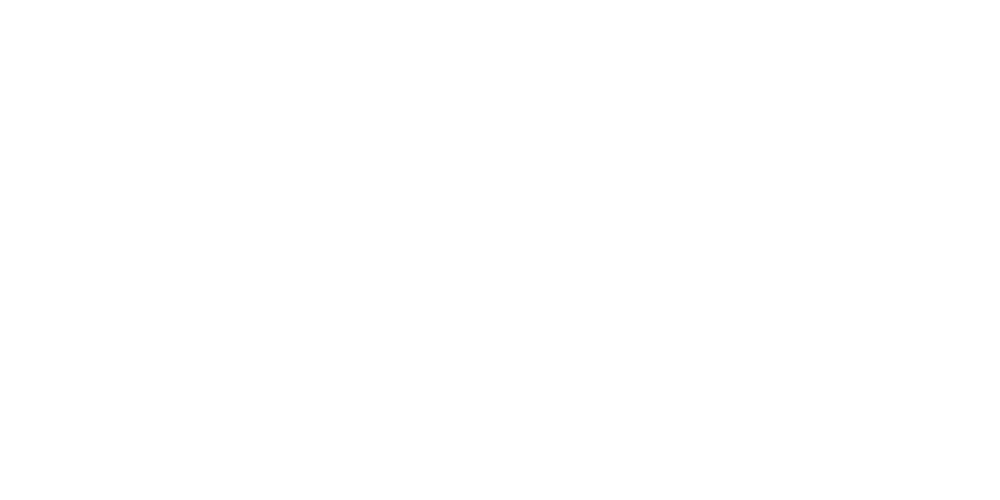

<ipython-input-7-860f6632e012>:24: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()
<ipython-input-7-860f6632e012>:24: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()
<ipython-input-7-860f6632e012>:24: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  

<ipython-input-7-860f6632e012>:24: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()
<ipython-input-7-860f6632e012>:24: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()
<ipython-input-7-860f6632e012>:24: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  

<ipython-input-7-860f6632e012>:24: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()
<ipython-input-7-860f6632e012>:24: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()
<ipython-input-7-860f6632e012>:24: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  

<ipython-input-7-860f6632e012>:24: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()
<ipython-input-7-860f6632e012>:24: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()
<ipython-input-7-860f6632e012>:24: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  

<ipython-input-7-860f6632e012>:24: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()
<ipython-input-7-860f6632e012>:24: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()
<ipython-input-7-860f6632e012>:24: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  

<ipython-input-7-860f6632e012>:24: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()
<ipython-input-7-860f6632e012>:24: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()
<ipython-input-7-860f6632e012>:24: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  

<ipython-input-7-860f6632e012>:24: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()
<ipython-input-7-860f6632e012>:24: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()
<ipython-input-7-860f6632e012>:24: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  

<ipython-input-7-860f6632e012>:24: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()
<ipython-input-7-860f6632e012>:24: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()
<ipython-input-7-860f6632e012>:24: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  

<ipython-input-7-860f6632e012>:24: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()
<ipython-input-7-860f6632e012>:24: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()
<ipython-input-7-860f6632e012>:24: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  

<ipython-input-7-860f6632e012>:24: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()
<ipython-input-7-860f6632e012>:24: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()
<ipython-input-7-860f6632e012>:24: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  

<ipython-input-7-860f6632e012>:24: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()
<ipython-input-7-860f6632e012>:24: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()
<ipython-input-7-860f6632e012>:24: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  

<ipython-input-7-860f6632e012>:24: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()
<ipython-input-7-860f6632e012>:24: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()
<ipython-input-7-860f6632e012>:24: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  

<ipython-input-7-860f6632e012>:24: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()
<ipython-input-7-860f6632e012>:24: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()
<ipython-input-7-860f6632e012>:24: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  

<ipython-input-7-860f6632e012>:24: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()
<ipython-input-7-860f6632e012>:24: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()
<ipython-input-7-860f6632e012>:24: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  

<ipython-input-7-860f6632e012>:24: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()
<ipython-input-7-860f6632e012>:24: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()
<ipython-input-7-860f6632e012>:24: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  

<ipython-input-7-860f6632e012>:24: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()
<ipython-input-7-860f6632e012>:24: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()
<ipython-input-7-860f6632e012>:24: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  

<ipython-input-7-860f6632e012>:24: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()
<ipython-input-7-860f6632e012>:24: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()
<ipython-input-7-860f6632e012>:24: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  

<ipython-input-7-860f6632e012>:24: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()
<ipython-input-7-860f6632e012>:24: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()
<ipython-input-7-860f6632e012>:24: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  

<ipython-input-7-860f6632e012>:24: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()
<ipython-input-7-860f6632e012>:24: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()
<ipython-input-7-860f6632e012>:24: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  

<ipython-input-7-860f6632e012>:24: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()
<ipython-input-7-860f6632e012>:24: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()
<ipython-input-7-860f6632e012>:24: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  

<ipython-input-7-860f6632e012>:24: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()
<ipython-input-7-860f6632e012>:24: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()
<ipython-input-7-860f6632e012>:24: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  

<ipython-input-7-860f6632e012>:24: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()
<ipython-input-7-860f6632e012>:24: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()
<ipython-input-7-860f6632e012>:24: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  

<ipython-input-7-860f6632e012>:24: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()
<ipython-input-7-860f6632e012>:24: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()
<ipython-input-7-860f6632e012>:24: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  

<ipython-input-7-860f6632e012>:24: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()
<ipython-input-7-860f6632e012>:24: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()
<ipython-input-7-860f6632e012>:24: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  

KeyboardInterrupt: 

In [7]:
%matplotlib notebook
fig = plt.figure(1,[10,5])
ax = fig.add_subplot(111)
plt.ion()

fig.show()
fig.canvas.draw()

for i in range(0,iteration):
    lineE = E_plot[i,:]
    #lineH = H_norm_plot[i,:]
    ax.clear()
    #plt.legend(handles = [lineE,lineH],labels=["Electric Field","Magnetic Field"])
    plt.ylabel('Value')
    plt.axvline(x=injection_point, color = "grey", linestyle="--")
    plt.ylim(-5,5)
    plt.xlabel('z (Space)')
    #plt.ylimit([-3,3])/
    plt.title(f'FDTD 1-D Iteration step: {i}/{iteration}')
    ax.plot(lineE)
    #ax.plot(lineH)
    fig.canvas.draw()
    #plt.savefig(f"1d-fdtd{i}.jpeg")
    ax = plt.axes()
    


In [ ]:
import numpy as np
from math import exp
from matplotlib import pyplot as plt
ke = 200
ex = np.zeros(ke)
hy = np.zeros(ke)
# Pulse parameters
kc = int(ke / 2)
t0 = 40
spread = 12
boundary_low = [0, 0]
boundary_high = [0, 0]
nsteps = 250
# Dictionary to keep track of desired points for plotting
plotting_points = [{'num_steps': 100, 'data_to_plot': None, 'label': ''},
                   {'num_steps': 225, 'data_to_plot': None, 'label': ''},
                   {'num_steps': 250, 'data_to_plot': None, 'label': 'FDTD cells'}]
# Main FDTD Loop
for time_step in range(1, nsteps + 1):
    # Calculate the Ex field
    for k in range(1, ke):
        ex[k] = ex[k] + 0.5 * (hy[k - 1] - hy[k])
    # Put a Gaussian pulse in the middle
    pulse = exp(-0.5 * ((t0 - time_step) / spread) ** 2)
    ex[kc] = pulse
    # Absorbing Boundary Conditions
    ex[0] = boundary_low.pop(0)
    boundary_low.append(ex[1])
    ex[ke - 1] = boundary_high.pop(0)
    boundary_high.append(ex[ke - 2])
    # Calculate the Hy field
    for k in range(ke - 1):
        hy[k] = hy[k] + 0.5 * (ex[k] - ex[k + 1])
            
    # Save data at certain points for later plotting
    for plotting_point in plotting_points:
        if time_step == plotting_point['num_steps']:
            plotting_point['data_to_plot'] = np.copy(ex)
            
# Plot the outputs as shown in Fig. 1.3
plt.rcParams['font.size'] = 12
fig = plt.figure(figsize=(8, 5.25))
def plot_e_field(data, timestep, label):
    """Plot of E field at a single time step"""
    plt.plot(data, color='k', linewidth=1)
    plt.ylabel('E$_x$', fontsize='14')
    plt.xticks(np.arange(0, 199, step=20))
    plt.xlim(0, 199)
    plt.yticks(np.arange(0, 1.2, step=1))
    plt.ylim(-0.2, 1.2)
    plt.text(100, 0.5, 'T = {}'.format(timestep),horizontalalignment='center')
    plt.xlabel('{}'.format(label))
    # Plot the E field at each of the time steps saved earlier
    for subplot_num, plotting_point in enumerate(plotting_points):
        ax = fig.add_subplot(3, 1, subplot_num + 1)
        plot_e_field(plotting_point['data_to_plot'],
                     plotting_point['num_steps'],
                     plotting_point['label'])
    plt.tight_layout()
    #plt.show()
    